<a href="https://www.kaggle.com/code/darshanprabhu09/n9-feature-engineering-pca-dimension-reduction?scriptVersionId=137633911" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > TABLE OF CONTENTS<br><div>  

* [1 - IMPORTING LIBRARIES](#1) 
    

* [2 - DATA COLLECTIONS & PREPARATION](#2)
    
    * [2.1 - CLEANING THE DATA](#2.1)
    * [2.2 - SPLITTING THE DATA](#2.2)
    * [2.3 - DEFINING VARIABLES](#2.3)
    
    
* [3 - EXPLORATORY DATA ANALYSIS](#3) 
    
* [4 - MODEL BUILDING](#4)
    
     * [4.1 - BASELINE MODEL](#4.1)
    
          * [Mean Absolute Error](#4.1.1)
    
    
    
* [5 - FEATURE ENGINEERING.](#5)
    
    * [5.1 - DIMENSIONALITY REDUCTION](#5.1)
    * [5.2 - PCA](#5.2)
    * [5.3 - SCALING](#5.3)
        * [5.3.1 - SCALAR](#5.3.1)
        * [5.3.2 - MIN-MAX SCALAR](#5.3.2)
        * [5.3.3 - NORMALIZER](#5.3.3)
    
    
* [4.2 - RANDOM FOREST REGRESSION](#4.2)
    
* [6 - CATEGORICAL ENCODING [DUMMY / ONE-HOT]](#6)
    * [6.1 - TRAINING MODEL](#6.1)
    * [6.2 - TESTING MODEL](#6.2)
    
    
* [7 - BINNING](#7)
    
* [8 - CLUSTERING](#8)
    
* [4.3 - K-MEANS](#4.3)
 
* [9 - FEATURE SELECTION](#9)
    * [9.1 - CONCATENATION](#9.1)
    
    
    
* [10 - FINAL TESTING](#10)
    
    
* [11 - CONCLUSION](#11)
    
* [12 - NOTE](#12)

# <a id="1"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 1 -  Importing Libraries <br><div>  

In [1]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor 

# <a id="2"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" >2 - Data Collection & Preparation . <br><div>  

In [2]:
df = pd.read_csv("/kaggle/input/california-housing-dataset/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# <a id="2.1"></a>
#### <span style="color: orange;"> 2.1 : We will be using dropna() to drop or remove the null records. </span>

In [3]:
df = df.dropna()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# <a id="2.2"></a>
### <span style="color: orange;"> 2.2 : Splitting the dataset into "Training" and "Testing" dataset. </span>

#### <span style="color: orange;"> 2.2.1: Training dataset. </span>

In [4]:
df = df.sample(frac = 1 , random_state = 2)


#Retrieving "17,000" rows in to training dataset:
train_df = df[:17000] 

train_df 


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
356,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY
2192,-119.95,36.80,30.0,1233.0,214.0,620.0,199.0,3.4297,112500.0,INLAND
9161,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,4.4107,213400.0,<1H OCEAN
168,-122.24,37.79,27.0,1632.0,492.0,1171.0,429.0,2.3173,125000.0,NEAR BAY
13155,-121.45,36.86,11.0,1613.0,335.0,1617.0,342.0,3.1375,146200.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
10272,-117.87,33.87,16.0,1332.0,368.0,1534.0,295.0,3.0227,297100.0,<1H OCEAN
1904,-120.00,38.87,12.0,1437.0,268.0,395.0,144.0,4.2250,127600.0,INLAND
12648,-121.47,38.50,17.0,1895.0,424.0,620.0,417.0,1.7188,137500.0,INLAND
20402,-118.86,34.21,26.0,3354.0,659.0,2020.0,648.0,4.1576,211800.0,<1H OCEAN


In [5]:
# resetting the Index :

train_df = train_df.reset_index(drop = True)
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY
1,-119.95,36.80,30.0,1233.0,214.0,620.0,199.0,3.4297,112500.0,INLAND
2,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,4.4107,213400.0,<1H OCEAN
3,-122.24,37.79,27.0,1632.0,492.0,1171.0,429.0,2.3173,125000.0,NEAR BAY
4,-121.45,36.86,11.0,1613.0,335.0,1617.0,342.0,3.1375,146200.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16995,-117.87,33.87,16.0,1332.0,368.0,1534.0,295.0,3.0227,297100.0,<1H OCEAN
16996,-120.00,38.87,12.0,1437.0,268.0,395.0,144.0,4.2250,127600.0,INLAND
16997,-121.47,38.50,17.0,1895.0,424.0,620.0,417.0,1.7188,137500.0,INLAND
16998,-118.86,34.21,26.0,3354.0,659.0,2020.0,648.0,4.1576,211800.0,<1H OCEAN


#### <span style="color: orange;"> 2.2.2: Testing dataset. </span>

In [6]:
df = df.sample(frac=1,random_state = 2)

#Retrieving remaining rows in to testing dataset:
test_df = df[17000:] 

test_df 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10643,-117.79,33.56,36.0,2057.0,329.0,658.0,309.0,7.8660,500001.0,<1H OCEAN
9732,-121.69,36.81,18.0,2837.0,522.0,1454.0,458.0,4.5272,221000.0,<1H OCEAN
4597,-118.28,34.05,41.0,1075.0,597.0,2260.0,614.0,1.3000,162500.0,<1H OCEAN
9485,-123.11,39.32,20.0,2745.0,504.0,1421.0,430.0,3.3431,137500.0,INLAND
5533,-118.42,33.96,44.0,1282.0,216.0,494.0,209.0,5.6180,365900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10432,-117.62,33.43,27.0,3858.0,1062.0,2321.0,873.0,3.3155,231000.0,NEAR OCEAN
4288,-118.30,34.09,40.0,3058.0,1215.0,3953.0,1223.0,1.8156,218800.0,<1H OCEAN
1868,-119.95,38.95,22.0,1058.0,352.0,851.0,269.0,2.0200,87500.0,INLAND
2324,-119.73,36.83,14.0,3348.0,491.0,1584.0,493.0,5.0828,111400.0,INLAND


In [7]:
# Resetting the value of "testing data"
test_df = test_df.reset_index(drop = True)
test_df 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.79,33.56,36.0,2057.0,329.0,658.0,309.0,7.8660,500001.0,<1H OCEAN
1,-121.69,36.81,18.0,2837.0,522.0,1454.0,458.0,4.5272,221000.0,<1H OCEAN
2,-118.28,34.05,41.0,1075.0,597.0,2260.0,614.0,1.3000,162500.0,<1H OCEAN
3,-123.11,39.32,20.0,2745.0,504.0,1421.0,430.0,3.3431,137500.0,INLAND
4,-118.42,33.96,44.0,1282.0,216.0,494.0,209.0,5.6180,365900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
3428,-117.62,33.43,27.0,3858.0,1062.0,2321.0,873.0,3.3155,231000.0,NEAR OCEAN
3429,-118.30,34.09,40.0,3058.0,1215.0,3953.0,1223.0,1.8156,218800.0,<1H OCEAN
3430,-119.95,38.95,22.0,1058.0,352.0,851.0,269.0,2.0200,87500.0,INLAND
3431,-119.73,36.83,14.0,3348.0,491.0,1584.0,493.0,5.0828,111400.0,INLAND


# <a id="2.3"></a>
#### <span style="color: orange;">2.3 -  Defining the "Dependent variables" (Y-Test) and (Y-Train) : </span>


In [8]:
y_train = train_df["median_house_value"].to_numpy()
y_test = test_df["median_house_value"].to_numpy()

print("The shape of Y_train is {} and Y_test is {}".format(y_train.shape,y_test.shape))

The shape of Y_train is (17000,) and Y_test is (3433,)


# <a id="3"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 3 - Exploratory Data analysis. <br><div>  

In [9]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY
1,-119.95,36.80,30.0,1233.0,214.0,620.0,199.0,3.4297,112500.0,INLAND
2,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,4.4107,213400.0,<1H OCEAN
3,-122.24,37.79,27.0,1632.0,492.0,1171.0,429.0,2.3173,125000.0,NEAR BAY
4,-121.45,36.86,11.0,1613.0,335.0,1617.0,342.0,3.1375,146200.0,INLAND


In [10]:
train_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16995,-117.87,33.87,16.0,1332.0,368.0,1534.0,295.0,3.0227,297100.0,<1H OCEAN
16996,-120.00,38.87,12.0,1437.0,268.0,395.0,144.0,4.2250,127600.0,INLAND
16997,-121.47,38.50,17.0,1895.0,424.0,620.0,417.0,1.7188,137500.0,INLAND
16998,-118.86,34.21,26.0,3354.0,659.0,2020.0,648.0,4.1576,211800.0,<1H OCEAN
16999,-118.24,33.93,37.0,1027.0,258.0,824.0,248.0,1.5132,86300.0,<1H OCEAN


In [11]:
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.79,33.56,36.0,2057.0,329.0,658.0,309.0,7.8660,500001.0,<1H OCEAN
1,-121.69,36.81,18.0,2837.0,522.0,1454.0,458.0,4.5272,221000.0,<1H OCEAN
2,-118.28,34.05,41.0,1075.0,597.0,2260.0,614.0,1.3000,162500.0,<1H OCEAN
3,-123.11,39.32,20.0,2745.0,504.0,1421.0,430.0,3.3431,137500.0,INLAND
4,-118.42,33.96,44.0,1282.0,216.0,494.0,209.0,5.6180,365900.0,<1H OCEAN


In [12]:
test_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3428,-117.62,33.43,27.0,3858.0,1062.0,2321.0,873.0,3.3155,231000.0,NEAR OCEAN
3429,-118.30,34.09,40.0,3058.0,1215.0,3953.0,1223.0,1.8156,218800.0,<1H OCEAN
3430,-119.95,38.95,22.0,1058.0,352.0,851.0,269.0,2.0200,87500.0,INLAND
3431,-119.73,36.83,14.0,3348.0,491.0,1584.0,493.0,5.0828,111400.0,INLAND
3432,-117.97,33.89,15.0,3801.0,542.0,1992.0,526.0,9.0683,367400.0,<1H OCEAN


In [13]:
train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.576579,35.639865,28.664765,2646.401941,539.847824,1427.906647,501.053000,3.877466,207189.258176
std,2.003209,2.134850,12.593451,2191.652139,424.706112,1136.612750,384.741657,1.898202,115566.267778
min,-124.350000,32.540000,1.000000,8.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1458.000000,297.000000,792.000000,281.000000,2.566700,119800.000000
50%,-118.510000,34.260000,29.000000,2139.000000,435.000000,1167.000000,410.000000,3.541700,180450.000000
75%,-118.010000,37.720000,37.000000,3142.250000,648.000000,1725.000000,606.000000,4.768750,265100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
test_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3433.000000,3433.000000,3433.000000,3433.000000,3433.000000,3433.000000,3433.000000,3433.000000,3433.000000
mean,-119.530679,35.586883,28.490242,2643.780076,537.581707,1431.394990,499.326245,3.887107,205441.377804
std,2.005945,2.120496,12.754312,2164.350894,414.899672,1082.526482,377.861420,1.900822,114100.687734
min,-124.260000,32.560000,2.000000,20.000000,4.000000,9.000000,5.000000,0.499900,14999.000000
25%,-121.760000,33.920000,18.000000,1458.000000,298.000000,790.000000,283.000000,2.575000,119400.000000
50%,-118.460000,34.240000,29.000000,2125.000000,438.000000,1176.000000,411.000000,3.553600,179500.000000
75%,-117.990000,37.700000,37.000000,3100.000000,640.000000,1726.000000,597.000000,4.812500,262900.000000
max,-114.570000,41.950000,52.000000,27870.000000,5027.000000,12153.000000,4855.000000,15.000100,500001.000000


# <a id="4"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 4 - Model Building .  <br><div>  

# <a id="4.1"></a>
#### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: brown; border-bottom: 8px solid WHITE" > 4.1 - Baseline model. <br><div>  

In [15]:
#Average or Mean of the median_house_value.
average_median_house_value = train_df["median_house_value"].mean()
print("average_median_house_value:",average_median_house_value)

average_median_house_value: 207189.25817647058


# <a id="4.1.1"></a>
#### <span style="color: orange;"> 4.1.1 - Getting the error of Baseline Model : </span>


In [16]:
# Getting the baseline value for future predictions.
baseline_model_test_predictions = [average_median_house_value]*len(test_df)

#Getting the mean absolute error.
mean_absolute_error(baseline_model_test_predictions,  y_test) 

90341.440416254

The value for mean absolute error we recieved is indeed terrible since it is in 90,000 . Lets do some Feature Engineering 

In [17]:
# Getting the baseline value for future predictions.
baseline_model_test_predictions = [average_median_house_value]*len(test_df)

#Getting the mean absolute error.
mean_absolute_error(baseline_model_test_predictions,  y_test) 

90341.440416254

# <a id="5"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 5 - Feature Engineering.<br><div>  

# <a id="5.1"></a>
#### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: brown; border-bottom: 8px solid WHITE" >5.1 - Dimensionality Reduction. <br><div>  
#### <span style="color: #FF4500;"> Dimensionality reduction can be used to remove or get rid of the columns or removing unwanted columns.

In [18]:

#Observing the correlation bewteen the total_room , total_bedrooms and households.

train_df[['total_rooms','total_bedrooms','households']].corr()

,total_rooms,total_bedrooms,households
total_rooms,1.000000,0.931023,0.918161
total_bedrooms,0.931023,1.000000,0.979402
households,0.918161,0.979402,1.000000


### From the above statement we can see as the total number of rooms increases the total number of bedrooms seems to be increasing as well


### <span style="color: #FF4500;"> Getting x_test_3 and x_train_3 and having three inputs into it as : 
total_rooms	 | total_bedrooms	 |  households
    

In [19]:
x_train_3 = train_df[['total_rooms','total_bedrooms','households']].to_numpy()
x_train_3.shape

(17000, 3)

In [20]:
x_test_3 = test_df[['total_rooms','total_bedrooms','households']].to_numpy()
x_test_3.shape

(3433, 3)

### <span style="color: #FF4500;"> Using Random Forest Regression model to get error in (X_train_3 , Y_train) and (X_test_3 , Y_test) :

In [21]:
# Fitting of the data .
forest_base = RandomForestRegressor(n_estimators = 50 , max_depth = 5).fit(x_train_3 , y_train)

# predicting future values for x_test_3 based on past values .
forest_base_test_predictions = forest_base.predict(x_test_3)

#Checking the mean absolute error
mean_absolute_error(forest_base_test_predictions , y_test)

79587.62312782009

# <a id="5.2"></a>
#### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: brown; border-bottom: 8px solid WHITE" > 5.2 - PCA (Principal Component Analysis). <br><div>  

In [22]:
# Importing PCA .
from sklearn.decomposition import PCA

# Using PCA function and passing arguments as n_components  having value "2".
pca = PCA(n_components = 2)

# Fitting the data into the model.
pcs = pca.fit(x_train_3)

pca

PCA(n_components=2)

### <span style="color: #FF4500;"> Using PCA to transform (X_train_3) and (X_test_3) into X_train_PCA and X_test_PCA :

In [23]:
x_train_pca = pca.transform(x_train_3)
x_test_pca = pca.transform(x_test_3)

x_train_pca.shape , x_test_pca.shape

((17000, 2), (3433, 2))

### <span style="color: #FF4500;"> Using Random Forest Regression model to get error in (X_train_PCA , Y_train) and (X_test_PCA , Y_test) :

In [24]:
# Fitting in the training model.
forest_pca = RandomForestRegressor(n_estimators = 50 , max_depth = 5).fit(x_train_pca,y_train)

# using .predict() to predict future values using testing set.
pca_predict = forest_pca.predict(x_test_pca)

# Cheking the error rate using MAE
mean_absolute_error(y_test,pca_predict)

77680.07668154057

# <a id="5.3"></a>
#### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: brown; border-bottom: 8px solid WHITE" > 5.3 - Pre-Processing & Scaling.  <br><div>  

### Scaling is referred and used when the variance between values is to be removed . We scale all the values as such the variance or difference between values can be removed and also to remove the Outliers.

In [25]:
# three libraries to be used for scaling:
from sklearn.preprocessing import StandardScaler , MinMaxScaler , Normalizer

# For visualizations ,
import matplotlib.pyplot as plt


# <a id="5.3.1"></a>
##### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: BROWN; border-bottom: 8px solid WHITE" > 5.3.1 - SCALAR <br><div>  

(array([1.444e+04, 2.091e+03, 3.120e+02, 8.700e+01, 4.000e+01, 1.600e+01,
        7.000e+00, 4.000e+00, 2.000e+00, 1.000e+00]),
 array([-1.20387697,  0.5898911 ,  2.38365917,  4.17742724,  5.97119531,
         7.76496338,  9.55873145, 11.35249952, 13.14626759, 14.94003566,
        16.73380373]),
 <BarContainer object of 10 artists>)

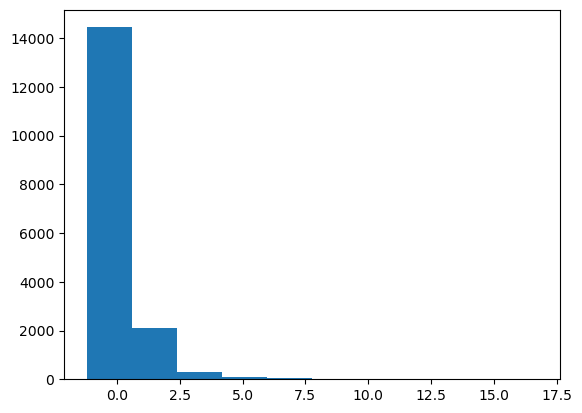

In [26]:
# fitting of the data :
scalar = StandardScaler().fit(x_train_3)

# Transforming the value :
x3_scaler_train_transform = scalar.transform(x_train_3)

#plotting value :
plt.hist(x3_scaler_train_transform[:,0])

In [27]:
#Printing X_train _scale :
x3_scaler_train_transform

array([[ 0.06141578,  0.08041603,  0.04664826],
       [-0.64492147, -0.76725387, -0.78510314],
       [ 0.69337772,  0.50896026,  0.62887424],
       ...,
       [-0.34285735, -0.27277976, -0.2184725 ],
       [ 0.32287007,  0.28056032,  0.38194804],
       [-0.73891725, -0.66364977, -0.65774121]])

# <a id="5.3.2"></a>
##### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: BROWN; border-bottom: 8px solid WHITE" > 5.3.2 - MIN-MAX Scalar <br><div>  

(array([1.444e+04, 2.091e+03, 3.120e+02, 8.700e+01, 4.000e+01, 1.600e+01,
        7.000e+00, 4.000e+00, 2.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

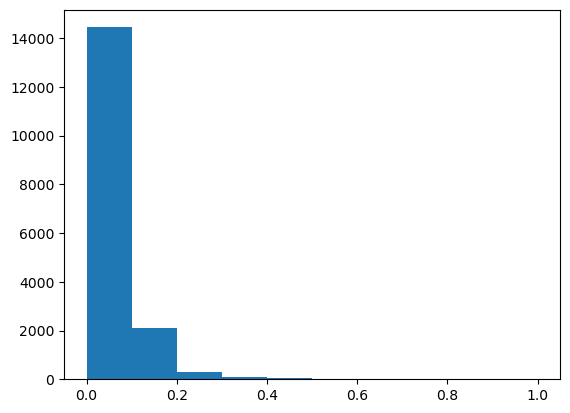

In [28]:
# fitting of the data :
minmax = MinMaxScaler().fit(x_train_3)

# Transforming the value :
x3_minmax_scaler_transform = minmax.transform(x_train_3)

#plotting value :
plt.hist(x3_minmax_scaler_transform[:,0])

# <a id="5.3.3"></a>
##### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: BROWN; border-bottom: 8px solid WHITE" > 5.3.3 - NORMALIZER <br><div>  

(array([1.0000e+00, 1.0000e+00, 2.0000e+00, 5.0000e+00, 9.0000e+00,
        1.5000e+01, 7.8000e+01, 3.0200e+02, 3.5140e+03, 1.3073e+04]),
 array([0.54258999, 0.58773511, 0.63288023, 0.67802535, 0.72317047,
        0.76831559, 0.81346071, 0.85860583, 0.90375095, 0.94889607,
        0.99404119]),
 <BarContainer object of 10 artists>)

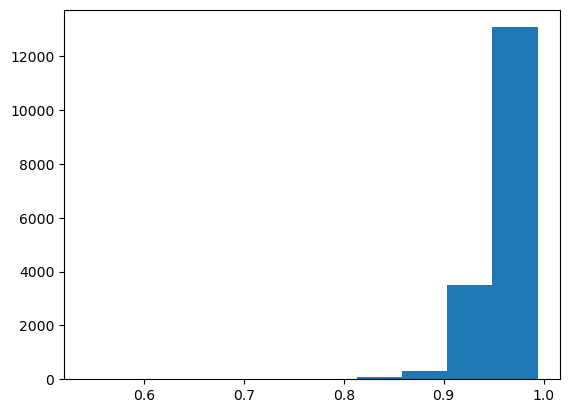

In [29]:
# fitting of the data :
normal = Normalizer().fit(x_train_3)

# Transforming the value :
x3_normalize = normal.transform(x_train_3)

#plotting value :
plt.hist(x3_normalize[:,0])

### <span style="color: #FF4500;"> Pre-process scale for x_test_3

In [30]:
x3_scaler_test_transform = scalar.transform(x_test_3)
x3_scaler_test_transform.shape

(3433, 3)

# <a id="4.2"></a>
#### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: BROWN; border-bottom: 8px solid WHITE" > 4.2 - Random Forest Regressor.<br><div>  

In [31]:
random_scaled_transform = RandomForestRegressor(n_estimators = 50 , max_depth = 5).fit(x3_scaler_train_transform,y_train)
random_scaled_model = random_scaled_transform.predict(x3_scaler_test_transform)
mean_absolute_error(y_test,random_scaled_model)

79791.59890898474

### <span style="color: #FF4500;">  PCA STEPS using Standard Scaler : <br> 1.) Standardization 2.) PCA 3.) RandomForest.

In [32]:
from sklearn.pipeline import Pipeline


# Fitting the pipeline , 
scale_pca_pipe_forest = Pipeline(steps = [('Scaler' , StandardScaler()),
                                          ('PCA',PCA(n_components =2)),
                                           ('Forest',RandomForestRegressor(n_estimators = 50 , max_depth = 5))])



scale_pca_pipe_forest


Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=2)),
                ('Forest',
                 RandomForestRegressor(max_depth=5, n_estimators=50))])

### <span style="color: #FF4500;">   Getting error of Standardization :

In [33]:
scale_pca_pipe_forest.fit(x_train_3,y_train)
scale_pca_pipe_predict = scale_pca_pipe_forest.predict(x_test_3)
mean_absolute_error(y_test,scale_pca_pipe_predict)

78278.91882734583

### <span style="color: #FF4500;">  PCA STEPS using Normalizer :  1.) Standardization 2.) PCA 3.) RandomForest.

In [34]:
from sklearn.pipeline import Pipeline


# Fitting the pipeline , 
scale_pca_pipe_forest = Pipeline(steps = [('Scaler' , Normalizer()),
                                          ('PCA',PCA(n_components =2)),
                                           ('Forest',RandomForestRegressor(n_estimators = 50 , max_depth = 5))])



scale_pca_pipe_forest


Pipeline(steps=[('Scaler', Normalizer()), ('PCA', PCA(n_components=2)),
                ('Forest',
                 RandomForestRegressor(max_depth=5, n_estimators=50))])

In [35]:
scale_pca_pipe_forest.fit(x_train_3,y_train)
scale_pca_pipe_predict = scale_pca_pipe_forest.predict(x_test_3)
mean_absolute_error(y_test,scale_pca_pipe_predict)

76013.58335305077

# <a id="6"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 6 - Categorical encoding. [DUMMY / ONE-HOT]  <br><div>   

#### <span style="color: #FF4500;">Note : categorical values ranges between 0 and just 1 , we do not take any other values , we can also term it as binary or logistic method.

 ### <span style="color: #FF4500;">Getting Dummy (one-hot encoding) for training dataset :


In [36]:
# Getting Dummy (one-hot encoding) for training dataset :

# The statement below will retrieve  categorical values for the column "ocean_proximity"
train_dummies = pd.get_dummies(train_df['ocean_proximity'])

# once retrieved the values are gonna be inserted into the dataframe.
train_dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


#### <span style="color: #FF4500;"> Concatinating the dummy values into training data.

In [37]:
train_df = pd.concat([train_df,train_dummies],axis = 1)
train_df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY,0,0,0,1,0
1,-119.95,36.80,30.0,1233.0,214.0,620.0,199.0,3.4297,112500.0,INLAND,0,1,0,0,0
2,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,4.4107,213400.0,<1H OCEAN,1,0,0,0,0
3,-122.24,37.79,27.0,1632.0,492.0,1171.0,429.0,2.3173,125000.0,NEAR BAY,0,0,0,1,0
4,-121.45,36.86,11.0,1613.0,335.0,1617.0,342.0,3.1375,146200.0,INLAND,0,1,0,0,0


### <span style="color: #FF4500;"> Total number of rows in dataframe (train_dummies):
    

In [38]:
train_df['ocean_proximity'].value_counts()

<1H OCEAN     7522
INLAND        5408
NEAR OCEAN    2172
NEAR BAY      1895
ISLAND           3
Name: ocean_proximity, dtype: int64

### <span style="color: #FF4500;"> Removing the dummy ISLAND since it has very low appearances
    


In [39]:
train_df.drop('ISLAND',inplace = True , axis = 1)
train_df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY,0,0,1,0
1,-119.95,36.80,30.0,1233.0,214.0,620.0,199.0,3.4297,112500.0,INLAND,0,1,0,0
2,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,4.4107,213400.0,<1H OCEAN,1,0,0,0
3,-122.24,37.79,27.0,1632.0,492.0,1171.0,429.0,2.3173,125000.0,NEAR BAY,0,0,1,0
4,-121.45,36.86,11.0,1613.0,335.0,1617.0,342.0,3.1375,146200.0,INLAND,0,1,0,0


### <span style="color: #FF4500;">  Getting Dummy (one-hot encoding) for testing dataset :



In [40]:
# Getting Dummy (one-hot encoding) for testing dataset :

# The statement below will retrieve  categorical values for the column "ocean_proximity"
test_dummies = pd.get_dummies(test_df['ocean_proximity'])

# once retrieved the values are gonna be inserted into the dataframe.
test_dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


### <span style="color: #FF4500;"> Concating both the dataframes

In [41]:

test_df = pd.concat([test_df,test_dummies],axis = 1)
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-117.79,33.56,36.0,2057.0,329.0,658.0,309.0,7.8660,500001.0,<1H OCEAN,1,0,0,0,0
1,-121.69,36.81,18.0,2837.0,522.0,1454.0,458.0,4.5272,221000.0,<1H OCEAN,1,0,0,0,0
2,-118.28,34.05,41.0,1075.0,597.0,2260.0,614.0,1.3000,162500.0,<1H OCEAN,1,0,0,0,0
3,-123.11,39.32,20.0,2745.0,504.0,1421.0,430.0,3.3431,137500.0,INLAND,0,1,0,0,0
4,-118.42,33.96,44.0,1282.0,216.0,494.0,209.0,5.6180,365900.0,<1H OCEAN,1,0,0,0,0


### <span style="color: #FF4500;"> Total number of rows in dataframe (test_dummies):


In [42]:
test_df['ocean_proximity'].value_counts()

<1H OCEAN     1512
INLAND        1090
NEAR OCEAN     460
NEAR BAY       370
ISLAND           1
Name: ocean_proximity, dtype: int64

### <span style="color: #FF4500;"> Removing the dummy ISLAND since it has very low appearances
    


In [43]:
test_df.drop('ISLAND',inplace = True , axis = 1)
test_df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-117.79,33.56,36.0,2057.0,329.0,658.0,309.0,7.8660,500001.0,<1H OCEAN,1,0,0,0
1,-121.69,36.81,18.0,2837.0,522.0,1454.0,458.0,4.5272,221000.0,<1H OCEAN,1,0,0,0
2,-118.28,34.05,41.0,1075.0,597.0,2260.0,614.0,1.3000,162500.0,<1H OCEAN,1,0,0,0
3,-123.11,39.32,20.0,2745.0,504.0,1421.0,430.0,3.3431,137500.0,INLAND,0,1,0,0
4,-118.42,33.96,44.0,1282.0,216.0,494.0,209.0,5.6180,365900.0,<1H OCEAN,1,0,0,0


### <span style="color: #FF4500;"> Making a model that only checks the dummy or takes the dummy value <br>
    COLUMN EXTRACTTON :


# <a id="6.1"></a>
### <span style="color: orange;">6.1 - Training model.


In [44]:
x_train_dummies = train_df.to_numpy()[:,-4]
x_train_dummies

array([0, 0, 1, ..., 0, 1, 1], dtype=object)

# <a id="6.2"></a>  
### <span style="color: orange;"> 6.2 - Testing model.

In [45]:
x_test_dummies = test_df.to_numpy()[:,-4]
x_test_dummies

array([1, 1, 1, ..., 0, 0, 1], dtype=object)

# <a id="7"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 7 - Binning   <br><div>   
          
          Binning or discretization is used to transform a continuous or numerical variable into a categorical feature. Binning of continuous variables introduces non-linearity and tends to improve the performance of the model. It can also be used to identify missing values or outliers.

<Axes: >

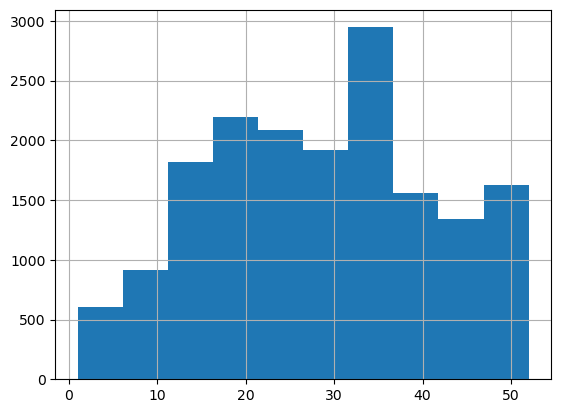

In [46]:
train_df['housing_median_age'].hist()

In [47]:
# Adding a new column to the training dataframe where "median_age < 30".
train_df['median_age < 30'] = (train_df['housing_median_age'] < 30).astype(int)
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,median_age < 30
0,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY,0,0,1,0,0
1,-119.95,36.80,30.0,1233.0,214.0,620.0,199.0,3.4297,112500.0,INLAND,0,1,0,0,0
2,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,4.4107,213400.0,<1H OCEAN,1,0,0,0,1
3,-122.24,37.79,27.0,1632.0,492.0,1171.0,429.0,2.3173,125000.0,NEAR BAY,0,0,1,0,1
4,-121.45,36.86,11.0,1613.0,335.0,1617.0,342.0,3.1375,146200.0,INLAND,0,1,0,0,1


### <span style="color: orange;"> Setting up X_train_median_age which only uses the binary indicator : 

In [48]:
X_train_median_age = train_df["median_age < 30"].to_numpy().reshape(-1,1)
X_train_median_age.shape

(17000, 1)

### <span style="color: orange;"> Setting up X_test_median_age which only uses the binary indicator : 

In [49]:
X_test_median_age = (test_df["housing_median_age"] < 30).to_numpy().reshape(-1,1)
X_test_median_age.shape

(3433, 1)

# <a id="8"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 8 - CLUSTERING. <br><div>   
Clustering is also defined as grouping of the elements having the same data-types or basically some similarties

### <span style="color: orange;"> Lets plot California first :

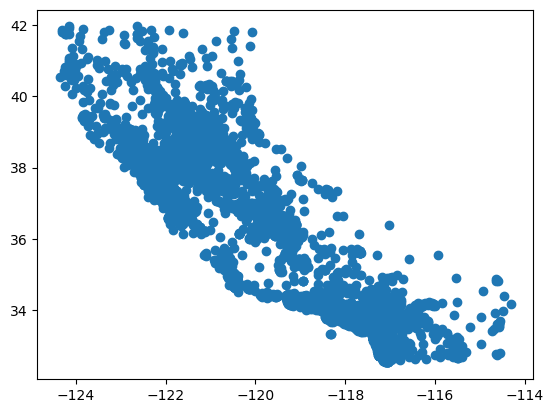

In [50]:
plt.scatter(train_df['longitude'],train_df['latitude'])

# <a id="4.3"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 4.3 - K-MEANS MODEL  <br><div>   

In [51]:
# Importing K means.
from sklearn.cluster import KMeans

# putting the 'long' and 'latitude' values into a variable 
x_train_lat_long = train_df[['longitude','latitude']].to_numpy()

#using k-means
kmeans = KMeans(n_clusters = 7).fit(x_train_lat_long)
kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 6, 0, ..., 1, 0, 0], dtype=int32)

### <span style="color: orange;"> Lets plot the colourful map :

In [52]:
import plotly.express as px


# we divided the map on the basis of clusters we defined above as "3".
px.scatter(x=train_df['longitude'] , y = train_df['latitude'] , color = kmeans.labels_)

 In the above map , the colors represent each clusters numbered between 1-7.

### <span style="color: orange;"> Creating x_train_clustering that uses only one hot encoding from the cluster label 

In [53]:
x_train_clustering = pd.get_dummies(pd.Series(kmeans.labels_)).to_numpy()
x_train_clustering

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### <span style="color: orange;"> Predict the clusters for test data , and create X_test_clustering using hot_encoding.

In [54]:
x_test_lat_long = test_df[['longitude','latitude']].to_numpy()
x_test_clustering = pd.get_dummies(pd.Series(kmeans.predict(x_test_lat_long))).to_numpy()
x_test_clustering.shape

(3433, 7)

# <a id="9"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 9 - FEATURE SELECTION.  <br><div>   
          
It is the process of combining all the essential features we made above.

### <span style="color: green;"> 1 - TRAINING DATA :

### <span style="color: orange;"> Observing the shape of x_train_clustering , x_train_scaled , dummy_x_train :

In [55]:
x_train_clustering.shape ,  train_dummies.shape ,  x3_scaler_train_transform.shape

((17000, 7), (17000, 5), (17000, 3))

# <a id="9.1"></a>   
### <span style="color: orange;">9.1 -  CONCATENATION :

In [56]:
x_train_full = np.concatenate([x_train_clustering , train_dummies , x3_scaler_train_transform],axis =1)
x_train_full.shape

(17000, 15)

### <span style="color: GREEN;"> 2 -  TESTING DATA :

### <span style="color: orange;"> Observing the shape of x_test_clustering , x_test_scaled , dummy_x_test :

In [57]:
x_test_clustering.shape ,  test_dummies.shape ,  x3_scaler_test_transform.shape

((3433, 7), (3433, 5), (3433, 3))

In [58]:
x_test_full = np.concatenate([x_test_clustering , test_dummies , x3_scaler_test_transform],axis =1)
x_test_full.shape

(3433, 15)

# <a id="10"></a>
##### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: BROWN; border-bottom: 8px solid WHITE" > 10 - FINAL TESTING. <br><div>   

In [59]:
random_forest_clustering = RandomForestRegressor(n_estimators = 50 , max_depth = 5).fit(x_train_full , y_train)
random_forest_predict = random_forest_clustering.predict(x_test_full)
mean_absolute_error(random_forest_predict,y_test)

66179.2398497147

# <a id="11"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: BROWN; border-bottom: 8px solid WHITE" > 11 - FINAL CONCLUSION. <br><div>   
          


### <span style="color: yellow;">  Lets compare results ;


In [60]:
# Getting the baseline value for future predictions.
baseline_model_test_predictions = [average_median_house_value]*len(test_df)

#Getting the mean absolute error.
first_test = mean_absolute_error(baseline_model_test_predictions,  y_test) 

print("The mae value for first test was : {}".format(first_test))

The mae value for first test was : 90341.440416254


In [61]:
random_forest_clustering = RandomForestRegressor(n_estimators = 50 , max_depth = 5).fit(x_train_full , y_train)
random_forest_predict = random_forest_clustering.predict(x_test_full)
final_test = mean_absolute_error(random_forest_predict,y_test)

print("The mae value for final test is : {}".format(final_test))

The mae value for final test is : 66111.06792520333


# <span style="color: red;">*HENCE , We can conclude from the above comparisions that we have featured the data till a lot of extent to reduce the error from "First test"(90341.440416254) to "Final test"(66035.59086044542).*

In [62]:
print("The amount of error we reduced from comparing the FIRST_TEST & FINAL_TEST is {}".format(first_test-final_test))

The amount of error we reduced from comparing the FIRST_TEST & FINAL_TEST is 24230.37249105067


# <a id="12"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: BROWN; border-bottom: 8px solid WHITE" > 12 - NOTE:<br><div>   
          


# <span style="color: BROWN;"> Thank you guys for your time . I hope Dimension reduction was indeed helpful for a lot of people out there and Do upvote it and do upvote as it will help to reach the work more and spread on a wide reach helping me on my Grandmaster journey . I really appreciate the fact that you completed the notebook from start to end , I will appreciate your comments , reviews ,  upvotes on the same . 

![Alt Text](https://cdn.dribbble.com/users/448124/screenshots/2177658/qq-.gif)